# 1. Data Exploration

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import norm, skew
import pylab

import warnings

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
%matplotlib inline

## Load dataset

In [2]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

## Data Overview

In [3]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
train.shape

(1460, 81)

In [5]:
# Check for duplicates
UniqueIds = len(set(train.Id))
idsTotal = train.shape[0]
idsDupli = idsTotal - UniqueIds
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 1460 total entries


In [6]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#drop the  'Id' colum since we don't need it for prediction
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Lets separate numerical and categorical columns for applying different visualization techniques on them

In [8]:
numeric_var = train.select_dtypes(exclude=['object']).drop(['MSSubClass','SalePrice'], axis=1).copy() #MSSubClass is nominal
numeric_var.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [9]:
disc_num_var = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

cont_num_var = []
for i in numeric_var.columns:
    if i not in disc_num_var:
        cont_num_var.append(i)
print("Continuous features are:\n",cont_num_var,"\n")
print("Discrete features are:\n",disc_num_var)

Continuous features are:
 ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'] 

Discrete features are:
 ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']


In [10]:
cat_train = train.select_dtypes(include=['object']).copy()
cat_train['MSSubClass'] = train['MSSubClass']   #MSSubClass is nominal
cat_train.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass'],
      dtype='object')

## Continuous variable visualization

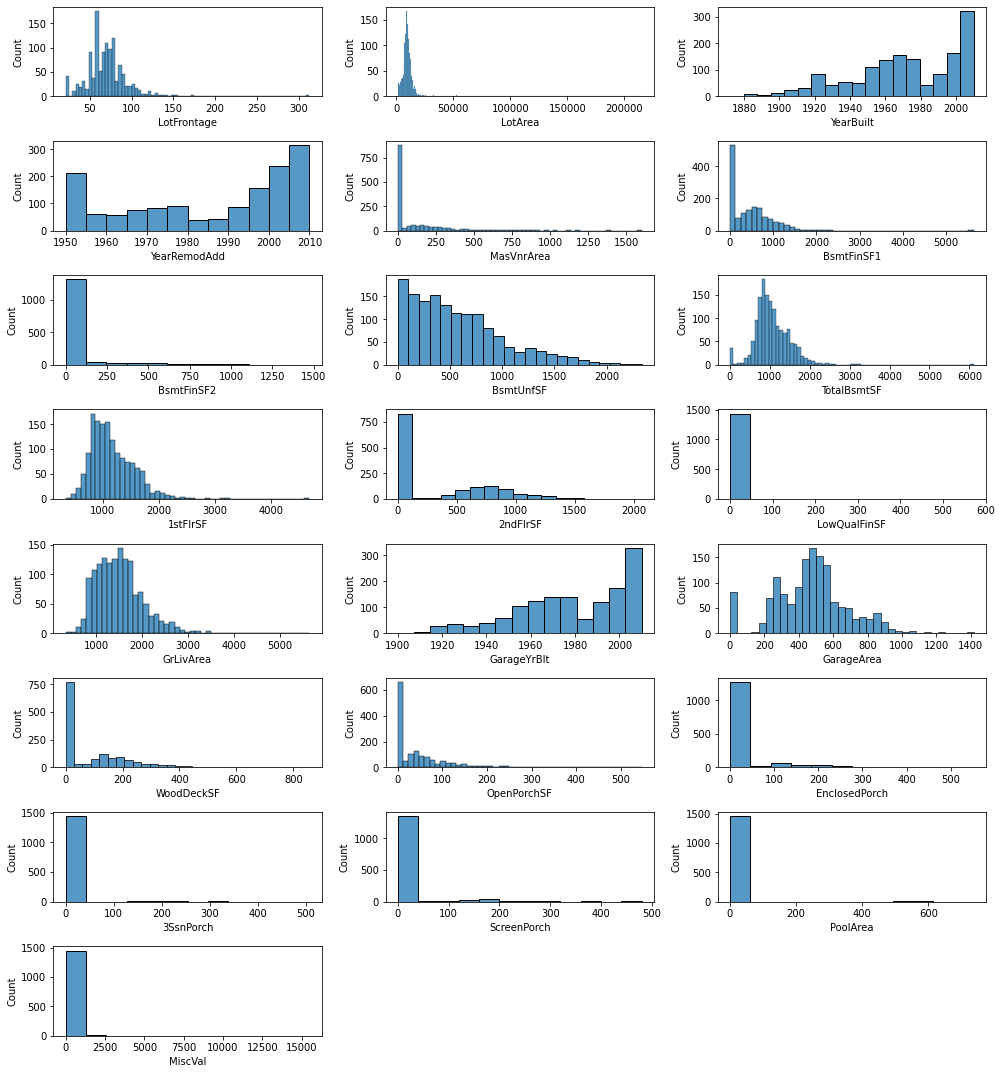

In [11]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(cont_num_var):
    plt.subplot(8,3,index+1)
    sns.histplot(numeric_var.loc[:,col].dropna(), kde=False)
fig.tight_layout(pad=1.0)

Most of the features have only 1 value. 

* BsmtFinSF2
* LowQualFinSF
* EnclosedPorch
* 3SsnPorch
* ScreenPorch
* PoolArea
* MiscVal

Lots of 0s in these features. May be we can drop it.

Lets plot them using boxplots

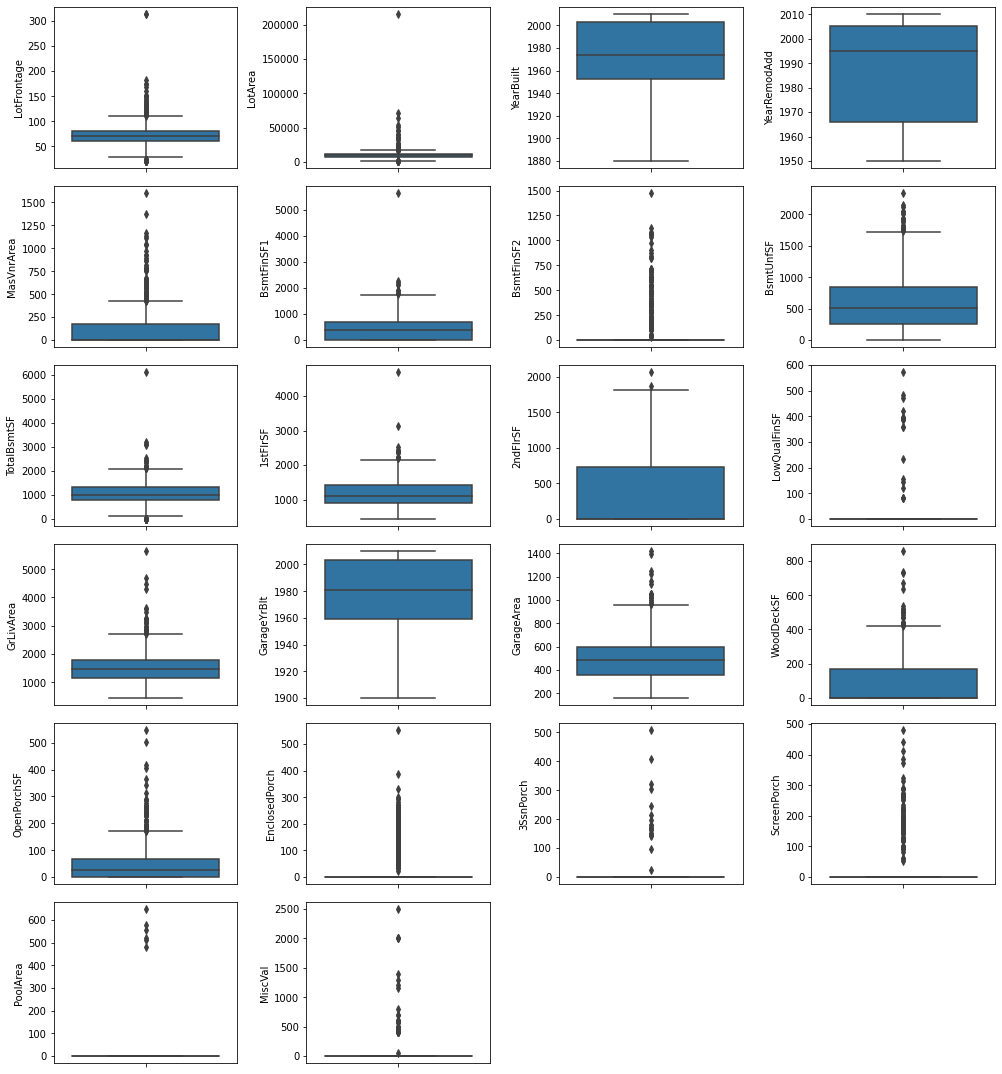

In [12]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(cont_num_var):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=numeric_var.dropna())
fig.tight_layout(pad=1.0)

The following features has extreme outliers
* LotFrontage
* LotArea
* BsmtFinSF1
* TotalBsmtSF
* 1stFlrSF
* GrLivArea

## Discrete numeric variable visualization

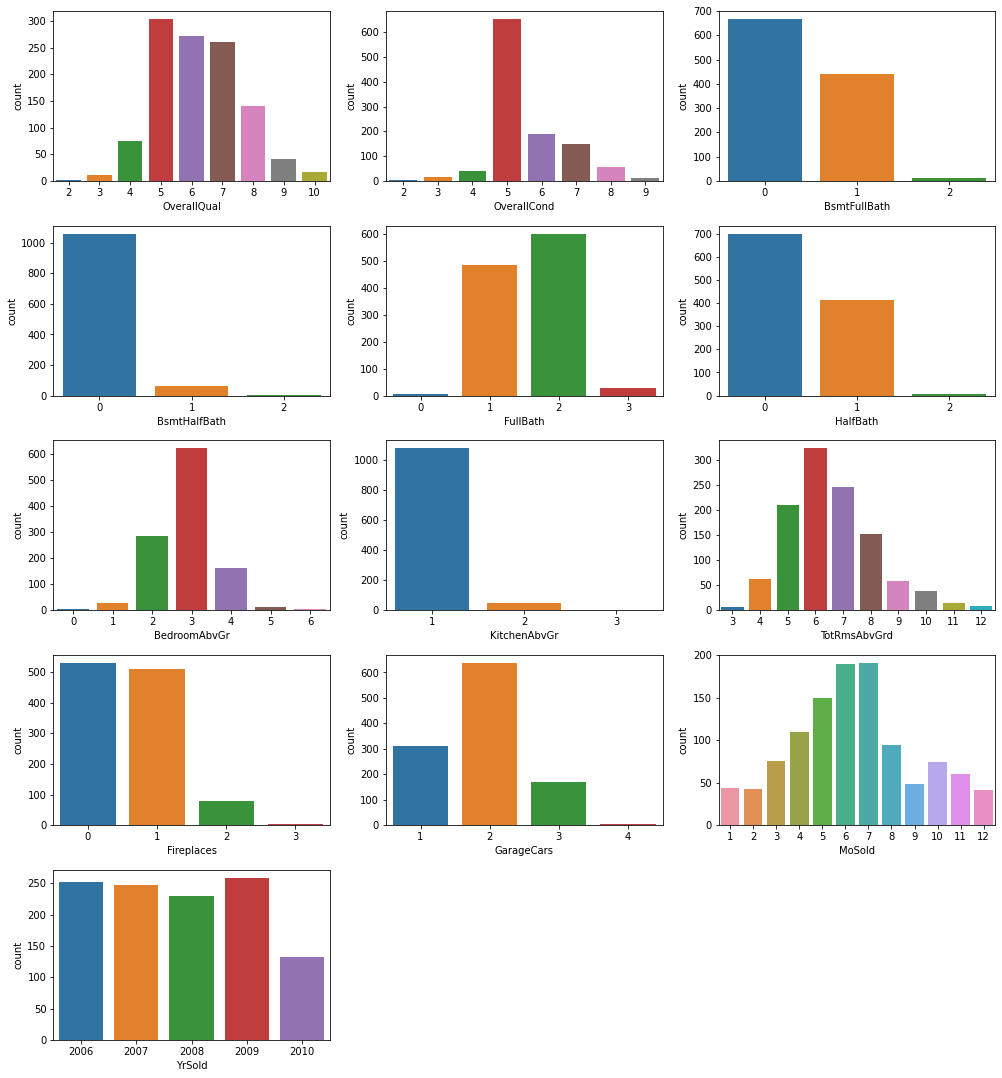

In [13]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(disc_num_var):
    plt.subplot(5,3,index+1)
    sns.countplot(x=col, data=numeric_var.dropna())
fig.tight_layout(pad=1.0)

## Categorical feature visualization

We can easily plot categorical features using countplot.

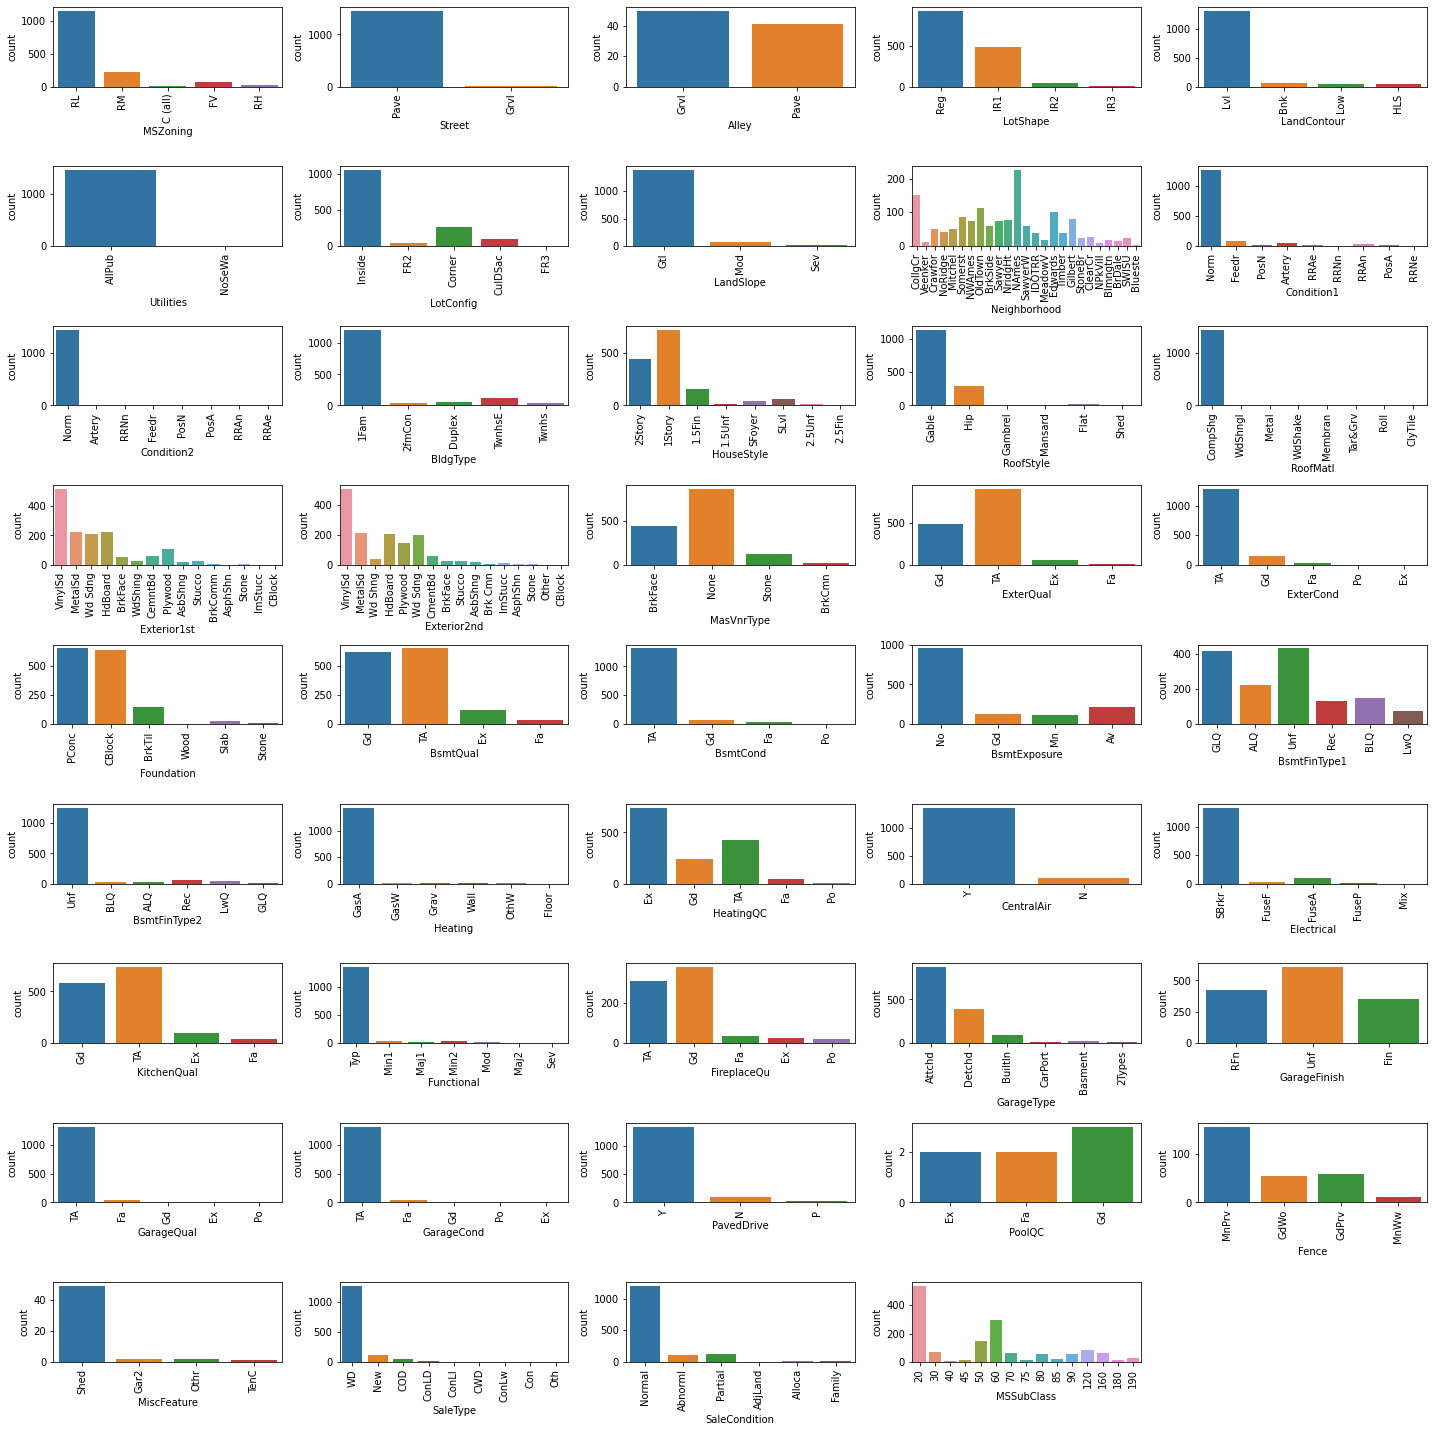

In [14]:
fig = plt.figure(figsize=(20,20))
for index in range(len(cat_train.columns)):
    plt.subplot(9,5,index+1)
    sns.countplot(x=cat_train.iloc[:,index], data=cat_train.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

## Data Correlation

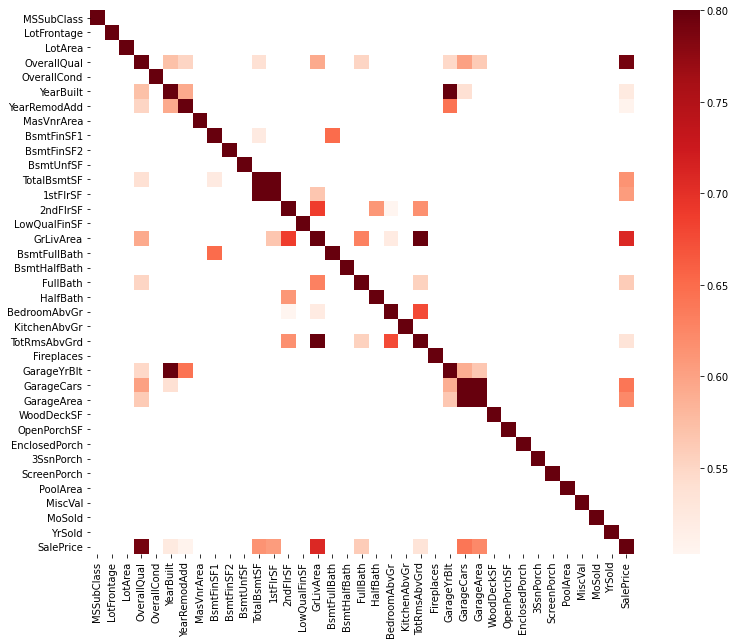

In [15]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(corrmat, mask = corrmat <0.5, vmax=.8, square=True, cmap='Reds');

**Summary:**

Highly Correlated variables:

* GarageYrBlt and YearBuilt
* TotRmsAbvGrd and GrLivArea
* 1stFlrSF and TotalBsmtSF
* GarageArea and GarageCars
* OverallQual and SalePrice
* GrLivArea and SalePrice


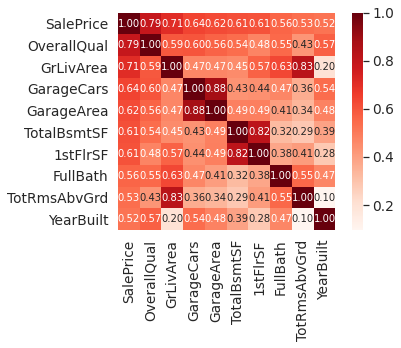

In [16]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap='Reds')
plt.show()

### Summary

1. OverallQual'and 'GrLivArea' are strongly correlated with 'SalePrice'.
2. 'GarageCars' and 'GarageArea' also has strong correlation with 'SalePrice'. But both specify the same thing. (**GarageCars**: Size of garage in car capacity, **GarageArea**: Size of garage in square feet). So we can delete one. (we keep GarageCars since it has more correlation to 'SalePrice')


## Target Variable - SalePrice

The property's sale price in dollars. This is the target variable that you're trying to predict.

In [17]:
#descriptive statistics summary
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

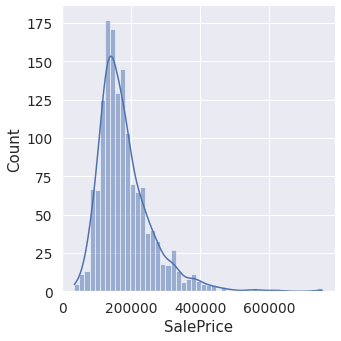

In [18]:
#histogram
sns.displot(train['SalePrice'], kde=True);

The distribution is positive skewed

In [19]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


'SalePrice' is positive skewed. So have to do a simple data transformation, precisely log transformation to make it normal distribution.

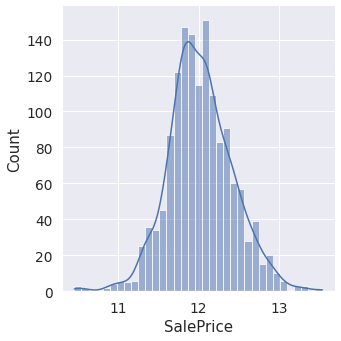

In [20]:
#applying log transformation on SalePrice to make it normal distribution
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.displot(train['SalePrice'], kde=True);

Now it looks more normally distributed

**log1p**, equal to log(1+x). When we have positively skewed data, we apply log transformation to bring them to same scale. 
However, log only works when all elements are greater than zero(log0 produces error as log0 is undefined). If your data is positively skewed and also contains 0 then we can not apply log transformation directly and hence we add 1 to every element and then apply log i.e. log(1+x) which in numpy can be done by log1p (meaning log 1 plus x) . 

To check whether the log1p transformation worked i.e. our variable actually became normal after applying log1p, we run any statistical tests (Anderson Darling Test, KS Test etc) or simply check the probability plot. 
Checking the distribution of log1p transformation using any statistical tests (Anderson Darling Test, KS Test etc) or Q-Q plot

A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a roughly straight line.


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.398259646654151, 12.024057394918403, 0.9953761551826702))

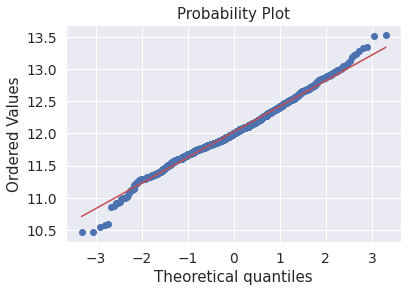

In [21]:
stats.probplot(train.SalePrice,plot=pylab)

The X-axis of the above plot has Quantiles values and Y-axis has the SalePrice values. From the plot, we can analyze that the data points of the SalePrice feature are falling on a straight line. This implies that it follows a normal distribution.

# 2. Data Preprocessing

## 2.1 Outliers

 Outliers can be identified using boxplots
 
 In the visualization part , we saw that the following features have extreme outliers:

* LotFrontage
* LotArea
* BsmtFinSF1
* TotalBsmtSF
* 1stFlrSF
* GrLivArea

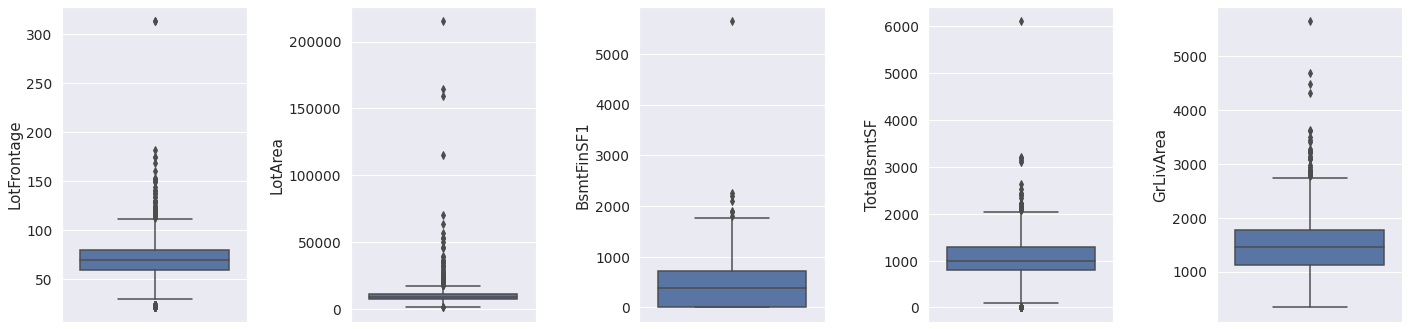

In [22]:
out_col = ['LotFrontage','LotArea','BsmtFinSF1','TotalBsmtSF','GrLivArea']
fig = plt.figure(figsize=(20,5))
for index,col in enumerate(out_col):
    plt.subplot(1,5,index+1)
    sns.boxplot(y=col, data=train)
fig.tight_layout(pad=1.5)

In [23]:
#train = train.drop(train[train['LotFrontage'] > 200].index)
#train = train.drop(train[train['LotArea'] > 100000].index)
#train = train.drop(train[train['BsmtFinSF1'] > 4000].index)
train = train.drop(train[train['TotalBsmtSF'] > 5000].index)
train = train.drop(train[train['GrLivArea'] > 4000].index)

**Concatenate train and test dataset for convenience of preprocessing**

In [24]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2915, 79)


## 2.2 Removing redundant features

We found from the correlation matrix that the following explanatory features are highly correlated:

* GarageYrBlt and YearBuilt
* TotRmsAbvGrd and GrLivArea
* 1stFlrSF and TotalBsmtSF
* GarageArea and GarageCars

We can remove some of these highly correlated features to avoid the problem of [multicollinearity](https://www.analyticsvidhya.com/blog/2021/02/multicollinearity-problem-detection-and-solution/).

We can delete 'GarageYrblt', 'TotRmsAbvGrd', 'GarageArea'

(GarageCars and GarageArea specifies the size of garage. (we keep GarageCars since it has more correlation to 'SalePrice')

I am not deleting '1stFlrSF' or 'TotalBsmtSF', because we can do a little preprocessing steps on them.


In [25]:
all_data.drop(['GarageYrBlt','TotRmsAbvGrd','GarageArea'], axis=1, inplace=True)

## 2.3 Missing data

In [26]:
#missing data
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (100 * all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data.head(35)
missing_data.style.background_gradient(cmap='Reds')


,Total,Percent
PoolQC,2907,99.725557
MiscFeature,2810,96.397942
Alley,2717,93.207547
Fence,2345,80.445969
FireplaceQu,1420,48.713551
LotFrontage,486,16.672384
GarageFinish,159,5.454545
GarageQual,159,5.454545
GarageCond,159,5.454545
GarageType,157,5.385935


### 2.3.1 Missing value Imputation

* PoolQC : Pool quality (NA -> No Pool)
It makes sense that more than 99% PoolQC value is missing. Majority of houses doesn't have a pool.

* MiscFeature: Miscellaneous feature not covered in other categories (NA -> None)
* Alley: Type of alley access to property (NA -> No alley access)
* Fence: Fence quality (NA -> No Fence)
* FireplaceQu: Fireplace quality (Na -> No Fireplace)


In [27]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

* GarageType: Garage location
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageQual: Garage quality
* GarageCond: Garage condition



In [28]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
all_data['GarageCars'] = all_data['GarageCars'].fillna(0)

* BsmtFinSF1
* BsmtFinSF2
* BsmtUnfSF
* TotalBsmtSF
* BsmtFullBath
* BsmtHalfBath

NA-> No Basement, for all these numeric basement values.

In [29]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [30]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

* MasVnrType
* MasVnrArea

In [31]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

* MSZoning: Identifies the general zoning classification of the sale,

filling the missing values with the most frequent value

In [32]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

* Functional: Home functionality (Assume typical unless deductions are warranted)

In [33]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

* Utilities: Type of utilities available

For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [34]:
# Drop
all_data = all_data.drop(['Utilities'], axis=1)

* KitchenQual: Kitchen quality
* Electrical: Electrical system
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* SaleType: Type of sale

In [35]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [36]:
# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [37]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


no more missing values

# 3. Feature engineering
Feature engineering refers to a process of selecting and transforming variables/features in your dataset when creating a predictive model using machine learning.

## 3.1 Drop unwanted features

I have noticed that sum of ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF') is equal to '**TotalBsmtSF**'. So we can drop 'BsmtFinSF1', 'BsmtFinSF2',and 'BsmtUnfSF'



In [38]:
all_data = all_data.drop(['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF'], axis=1)

## 3.2 Combining Features

In [39]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

#Adding all bathrooms
all_data['TotalBath'] = all_data['BsmtFullBath'] + all_data['FullBath'] + all_data['HalfBath']

## 3.3 Changing Data Type
* Since 'MSSubClass' and 'OverallCond' is actually a category but given as an integer column, we change its data type to string.
* 'YrSold' and 'MoSold' are given as integer, we can change it into string

In [40]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#OverallCond: Rates the overall condition of the house
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

## 3.4 Skewed Features

In [41]:
numeric_features = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("Skew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head()


Skew in numerical features: 



,Skew
MiscVal,21.932147
PoolArea,18.701829
LotArea,13.123758
LowQualFinSF,12.080315
3SsnPorch,11.368094


### 3.4.1 Box Cox Transformation of skewed features


In [42]:
skewness = skewness[abs(skewness) > 0.5]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 28 skewed numerical features to Box Cox transform


In [43]:
# Fixing Skewed features using boxcox transformation. 
from scipy.special import boxcox1p
skewed_features = skewness.index
lmbd = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lmbd)

## 3.5 Label Encoding Ordinal variables 

Ordinal data is a categorical data type where the variables have natural, ordered categories and the distances between the categories is not known. These data exist on an ordinal scale. The ordinal scale is distinguished from the nominal scale by having a ranking. 

Ordinal variables may contain ordered set information. So we need to Label Encode these variables.

Label encoding convets each value in a column feature to a number. It uses number sequencing that introduce relation/comparison between values.


In [44]:
from sklearn.preprocessing import LabelEncoder
cols = ('LotShape', 'LandSlope', 'Street', 'Alley', 'OverallQual', 'OverallCond', 'ExterQual',
        'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2','HeatingQC',
        'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish','GarageQual', 'GarageCond',
        'PavedDrive', 'PoolQC', 'Fence') 

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2915, 74)


In [45]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2915, 246)


**Splitting the new train and test sets.**

In [46]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# 4. Modelling

## 4.1 Importing Libraries

In [47]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb

## 4.2 Define a cross validation strategy


In [48]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## 4.3 Base Models

* LASSO Regression :
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline



In [49]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

* Elastic Net Regression :
again made robust to outliers

In [50]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

* Kernel Ridge Regression :


In [51]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

* Gradient Boosting Regression :
With huber loss that makes it robust to outliers

In [52]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

### 4.3.1 Base models scores
Let's see how these base models perform on the data by evaluating the cross-validation rmsle error

In [53]:
score1 = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score1.mean(), score1.std()))

score2 = rmsle_cv(ENet)
print("\nElastic Net score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))

score3 = rmsle_cv(KRR)
print("\nKernelRidge score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

score4 = rmsle_cv(GBoost)
print("\nGradient Boosting score: {:.4f} ({:.4f})\n".format(score4.mean(), score4.std()))




Lasso score: 0.1113 (0.0064)


Elastic Net score: 0.1113 (0.0064)


KernelRidge score: 0.1150 (0.0069)


Gradient Boosting score: 0.1169 (0.0076)



## 4.4 Stacking models

In [54]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [55]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1083 (0.0062)


In [56]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [57]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.08109191287052926


In [58]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = stacked_pred
sub.to_csv('submission.csv',index=False)

## Credits:
I followed these notebooks:

* https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard#Stacked-Regressions-to-predict-House-Prices
* https://www.kaggle.com/angqx95/data-science-workflow-top-2-with-tuning/notebook#1.-Understanding-Data
* https://www.kaggle.com/janiobachmann/house-prices-useful-regression-techniques/notebook